# Import Libraries

https://code.earthengine.google.com/6503d98eb855b0e50c317370c8cc24e1 

In [1]:
!python --version

Python 3.10.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from datetime import datetime 

In [3]:
# Better visualization
plt.style.use('ggplot')

## Declare Constants

In [4]:
KENYA_RAW_DATA = '../raw-data/Kenya_training.csv'

### Logging progress

In [5]:
# def log_progress(message): 
#     timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
#     now = datetime.now() # get current timestamp 
#     timestamp = now.strftime(timestamp_format) 
#     with open("./log/kenya_log.txt","a") as f: 
#         f.write(timestamp + ' : ' + message + '\n')

# 1. Load Data

In [5]:
# Kenya Training

# log_progress('Preliminaries complete. Initiating main process')

try: 
    # Try to load the cleaned data (if it exists)
    kenya_train = pickle.load(open("../cleaned-data/kenya_training_cleaned.pkl", 'rb'))

    print("Loaded cleaned data from checkpoint")
    
except FileNotFoundError:
    # If the cleaned data doesn't exist, load the raw data
    kenya_train = pd.read_csv(KENYA_RAW_DATA, index_col=0)

    print("Loading raw data...")

display(kenya_train.head(), kenya_train.tail())

# log_progress('Data extraction complete. Initiating EDA process')


Loading raw data...


,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
ID,,,,,,,,,,,,,,,
1,37.059054,0.046039,2731.0,3035.0,5418.0,5306.5,2958.0,4610.5,5099.5,2994.0,4108.5,3187.5,-6.861458,-12.162713,1
2,37.059503,0.047296,2921.0,3329.0,5834.0,6472.0,4144.5,5782.0,6302.0,3344.0,5269.0,4471.5,-8.082717,-14.619608,1
3,37.057527,0.047656,3828.0,4163.0,6420.0,7890.5,5408.5,6695.5,7302.0,4380.0,6905.0,6905.5,-7.767043,-14.880353,1
4,37.057976,0.047925,2556.0,2839.0,4822.0,5276.5,3201.0,4643.0,5069.5,2787.0,3832.0,2867.5,-7.773118,-15.587653,1
5,37.056359,0.048554,3790.0,4009.0,6476.0,6199.5,4285.0,5711.0,6079.5,3939.0,4892.5,3702.5,-6.104467,-15.431915,1


,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
ID,,,,,,,,,,,,,,,
994,37.094537,0.073797,1410.5,1662.0,3853.0,4239.0,2055.5,3622.5,4120.5,1502.5,2999.0,2112.0,-8.542699,-13.392836,2
995,37.138645,0.075683,1481.0,1787.5,4756.0,4309.5,2243.0,3735.5,4125.0,1569.0,3298.0,2514.5,-9.613595,-17.171070,2
996,37.077020,0.076761,1608.5,1870.0,3797.0,3821.5,2292.0,3362.0,3644.0,1843.0,3784.5,2965.5,-9.834393,-16.040201,2
997,37.057796,0.077929,1481.5,1834.0,4018.0,4255.5,2345.0,3767.0,4055.0,1818.0,3546.0,2633.5,-9.295322,-15.336483,2
998,37.055730,0.080983,1382.0,1847.5,6332.0,6513.0,2304.0,5689.0,6519.5,1365.5,3107.5,2028.5,-8.558433,-15.738156,2


# 2. Exploratory Data Analysis (EDA)

### 2.1.0 

- Shape of DataFrame
- Data Types

In [5]:
print("Kenya Training Shape:", kenya_train.shape)

kenya_train.dtypes

Kenya Training Shape: (998, 15)


lon          float64
lat          float64
blue_p50     float64
green_p50    float64
nir_p50      float64
nira_p50     float64
re1_p50      float64
re2_p50      float64
re3_p50      float64
red_p50      float64
swir1_p50    float64
swir2_p50    float64
VV_p50       float64
VH_p50       float64
TARGET         int64
dtype: object

### 2.1.1 Missing Values

In [6]:
kenya_missing_values = kenya_train.isnull().sum()
print("Kenya Training Data Missing Values:", kenya_missing_values)

Kenya Training Data Missing Values: lon          0
lat          0
blue_p50     0
green_p50    0
nir_p50      0
nira_p50     0
re1_p50      0
re2_p50      0
re3_p50      0
red_p50      0
swir1_p50    0
swir2_p50    0
VV_p50       0
VH_p50       0
TARGET       0
dtype: int64


### 2.2 Descriptive Statistics

In [26]:
display("Kenya Training Data Summary:", kenya_train.describe())

'Kenya Training Data Summary:'

,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,37.252425,0.075933,2170.822645,2384.236473,4084.263527,4238.900301,2766.331663,3814.640782,4136.091683,2375.989479,3358.880261,2617.702405,-8.163459,-15.192528,1.513026
std,0.112068,0.034866,691.245929,651.399984,880.874587,886.329809,622.303905,770.130322,876.365757,687.701428,633.248322,702.969272,2.231359,2.224911,0.500081
min,37.026894,0.005794,1253.500000,1381.000000,2061.000000,2139.500000,1617.500000,2083.500000,2121.500000,1243.000000,1579.500000,1347.500000,-14.470079,-26.436514,1.000000
25%,37.164022,0.047229,1502.250000,1791.625000,3455.500000,3615.750000,2252.000000,3269.625000,3522.625000,1779.250000,3004.625000,2216.375000,-9.328339,-16.148069,1.000000
50%,37.260501,0.073258,2188.000000,2355.000000,3985.000000,4138.750000,2719.000000,3739.750000,4016.250000,2408.000000,3281.250000,2451.500000,-8.280302,-15.008210,2.000000
75%,37.328369,0.099017,2633.875000,2815.750000,4676.000000,4846.875000,3153.625000,4338.125000,4763.750000,2829.000000,3577.500000,2821.750000,-7.269487,-13.982456,2.000000
max,37.498060,0.172881,6130.000000,6066.000000,9248.000000,9507.000000,6839.000000,8542.000000,9235.000000,6140.000000,10014.000000,10692.000000,10.258422,-4.934835,2.000000


# Central Tendency:

- `Mean:` While less crucial for categorical features, the mean helps you understand the average value of numerical features.
Use Case: If your numerical features are highly skewed, the mean might not be the best measure of central tendency. You might want to consider the median instead.

- `Median:` Represents the middle value of a sorted dataset.
Use Case: The median is a more robust measure of central tendency than the mean when dealing with outliers or skewed data.

- `Mode:` The most frequent value in a dataset.
Use Case: Highly useful for categorical features, as it tells you the most common category. For numerical features, it can help identify potential outliers or unexpected peaks in the data.


# Dispersion:
- `Standard Deviation:` Measures how spread out the data is around the mean.
Use Case: A high standard deviation suggests a wide range of values, which can indicate significant variability in a feature. This can be important for understanding the impact of a feature on your classification model.

- `Variance:` The square of the standard deviation, providing a measure of how much the data deviates from the mean.
Use Case: More commonly used in statistical analysis than for visualization.

- `Range:` The difference between the maximum and minimum values in a dataset.
Use Case: Provides a quick sense of the spread of your data, but it can be sensitive to outliers.

- `Interquartile Range (IQR):` The difference between the 75th percentile and the 25th percentile, providing a robust measure of spread.
Use Case: Helpful for identifying outliers, especially when dealing with skewed data. Calculate the IQR to identify potential outliers: Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR can be considered an outlier.

# Distribution:
- `Percentiles:` Show you the values at specific points in the sorted dataset (e.g., 25th percentile, 50th percentile, 75th percentile).
Use Case: Help you understand the spread of your data and identify potential outliers.

- `Histograms:` Visualize the distribution of your data.
Use Case: Helps you see whether the data is normally distributed, skewed, or multimodal. Look for unusual patterns that might indicate issues with your data or features that might be highly influential in your classification model.

- `Box Plots:` Provide a visual representation of the distribution of your data using quartiles, median, and outliers.
Use Case: Similar to histograms, but more compact.

- `Frequency Tables:` Shows the frequency (count) of each unique value in a categorical feature.
Use Case: Helps you understand the distribution of your categorical features and identify potential class imbalances.

# Relationships:
- `Correlation Matrix:` Measures the strength and direction of the linear relationship between pairs of features.
Use Case: Identifies potential feature correlations that can impact your model's performance.

- `High Correlation:` Highly correlated features might be redundant and could lead to multicollinearity in your model. You might want to consider removing one of the highly correlated features or using techniques like principal component analysis (PCA).

- `Low Correlation:` Features with low correlation might not be informative for your classification task. You might consider excluding them from your model.

# Additional Tips:

- `Target Variable:` Pay close attention to the descriptive statistics of your target variable, particularly in a classification task. This will help you understand the class distribution and identify potential class imbalances.

- `Visualizations:` Always visualize your data using histograms, box plots, scatter plots, or other visualizations. This will help you gain a deeper understanding of your data and make informed decisions about feature selection and model building.

By utilizing these descriptive statistics during EDA, you can better understand the characteristics of your data, identify potential problems, and make informed decisions that will improve the performance of your classification model

### 2.3 Data Visualization

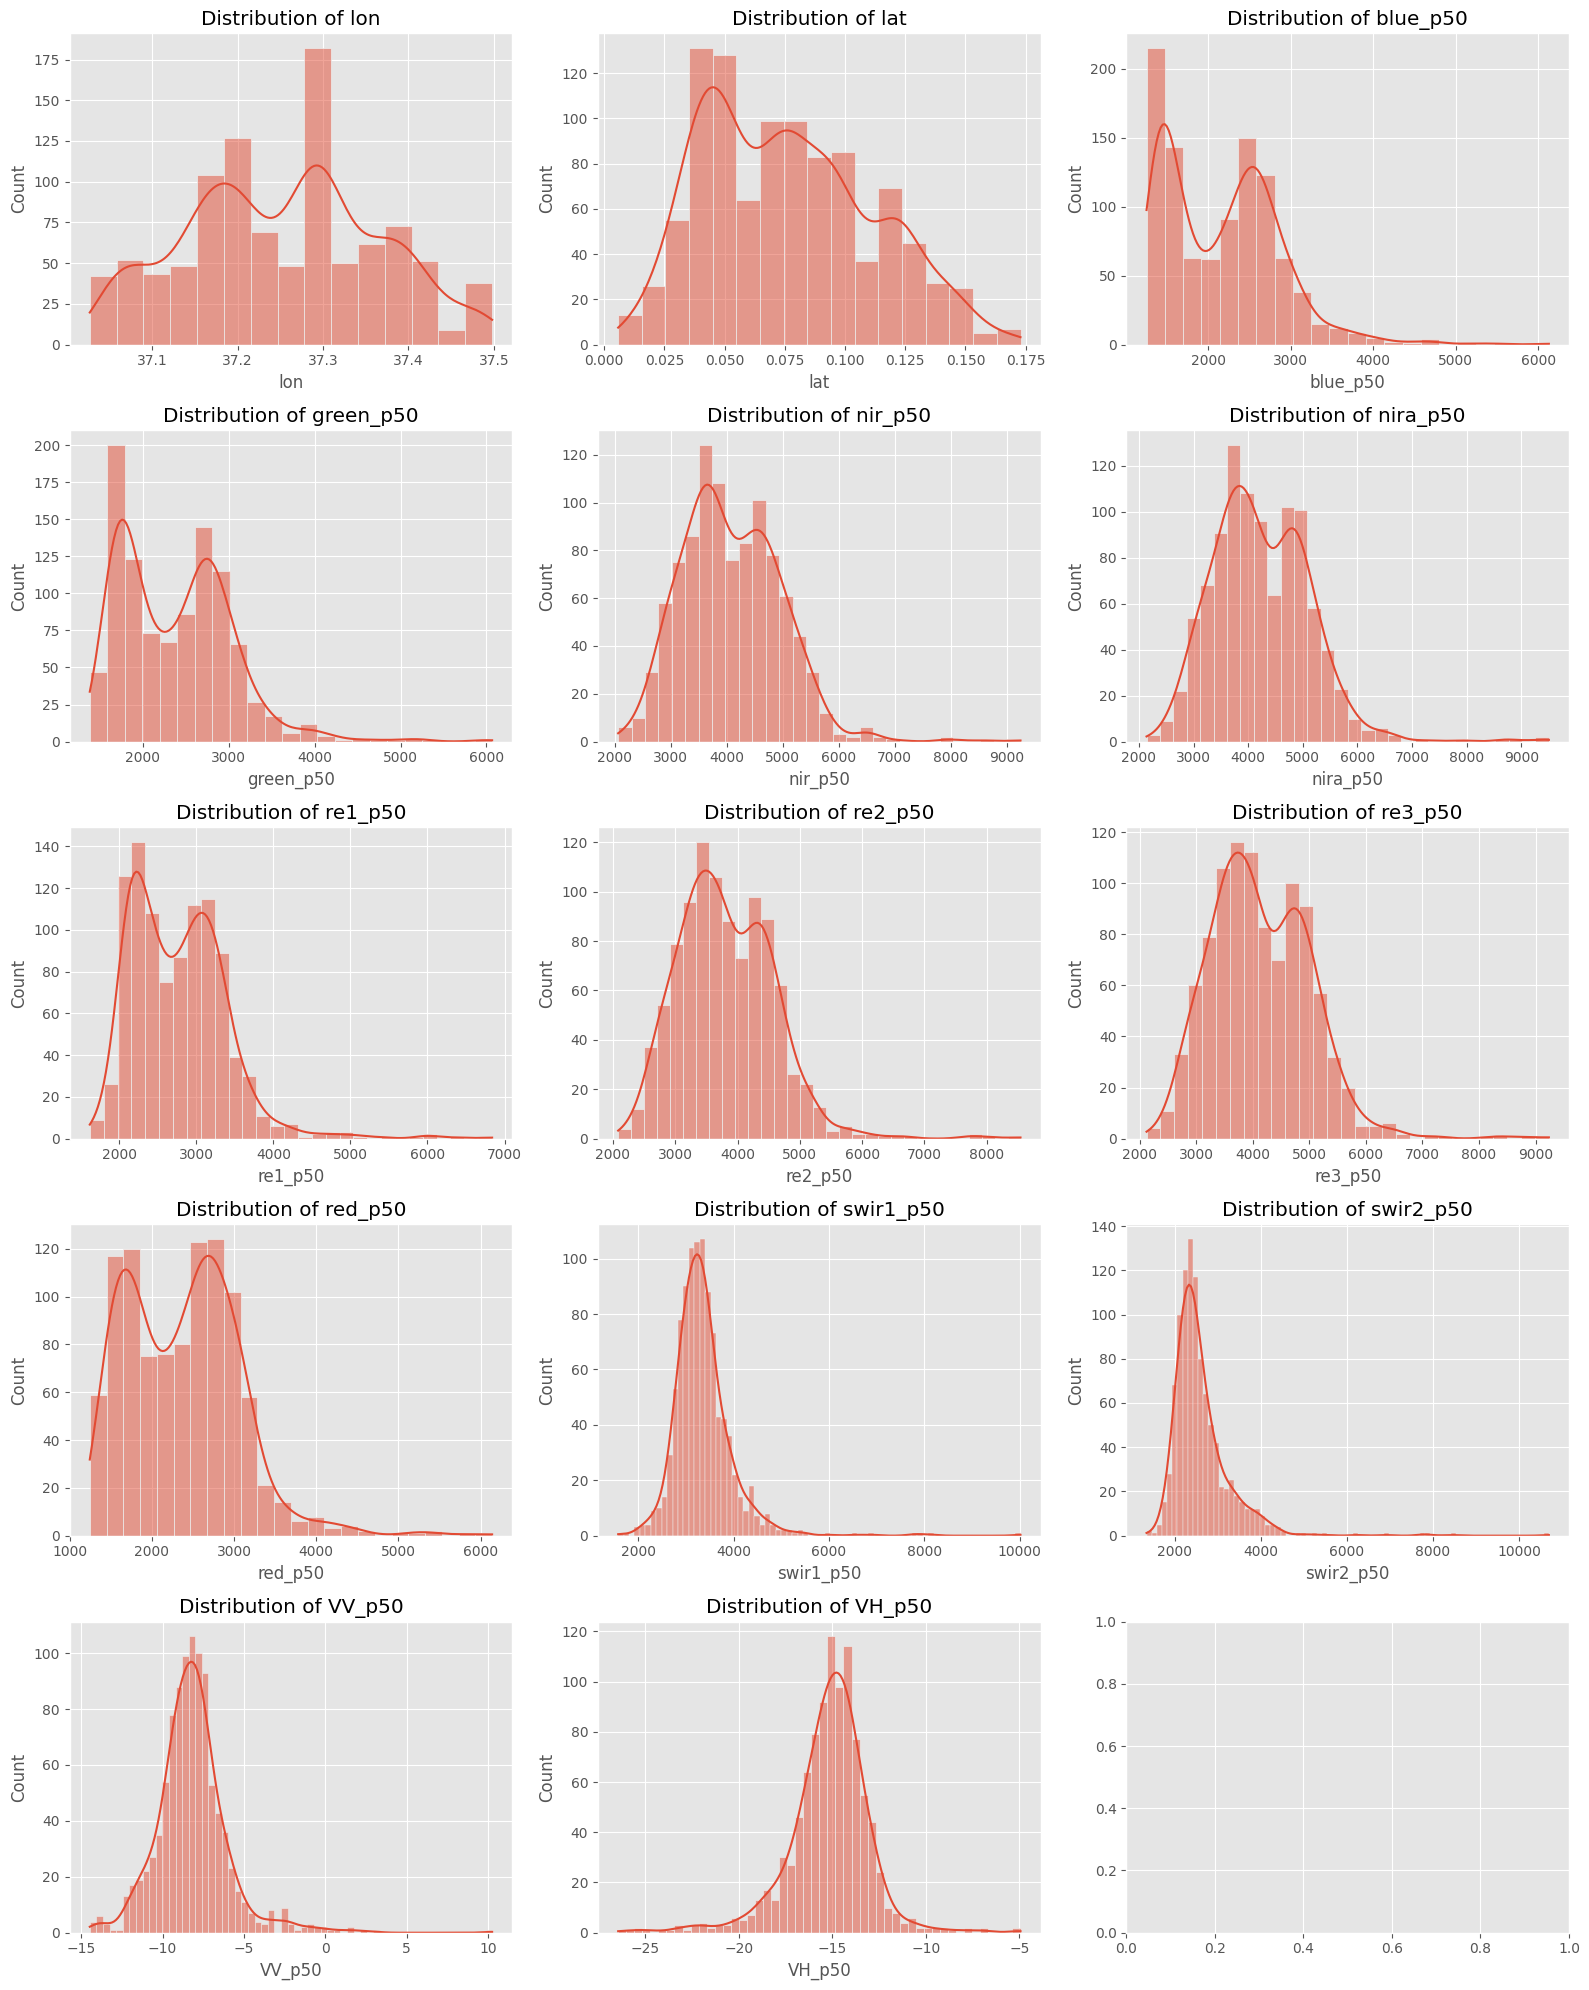

In [33]:
num_columns = len(kenya_train.columns) - 1  # Exclude the target column
num_rows = (num_columns + 2) // 3  # Calculate the required number of rows

# Create a figure and axes
fig, axs = plt.subplots(num_rows, 3, figsize=(16, num_rows * 4))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot histograms for each feature
for idx, column in enumerate(kenya_train.columns):
    if column != "TARGET":  # Exclude the target column
        sns.histplot(kenya_train[column], kde=True, ax=axs[idx])
        axs[idx].set_title(f"Distribution of {column}")

# Hide any unused subplots
for j in range(idx + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Interpretation of the distributions and suggestions for feature selection and a suitable scikit-learn model.

## Interpreting the Distributions

`Red (red_p50):` The distribution of the red band is slightly right-skewed. This suggests that there are a few high values (high reflectance), which could correspond to plastic cover.

`Near-Infrared (nir_p50):` The NIR distribution also shows a right skew, which is expected as healthy vegetation usually absorbs more NIR light. However, the long tail could indicate some high values related to plastic, which reflects NIR.

`Short-Wave Infrared (swir1_p50, swir2_p50):` Both SWIR bands show distributions that are shifted towards higher values. This is a strong indicator of plastic cover, as plastic generally reflects more in SWIR compared to vegetation.

`Green (green_p50):` The green band is less informative, with a distribution similar to vegetation. This band is likely not as crucial for plastic detection.

`Blue (blue_p50):` The blue band is also less informative, with a distribution that is close to vegetation. It might have limited usefulness for distinguishing plastic types.

`VV_p50 and VH_p50 (SAR):` These SAR bands have very different distributions compared to the optical bands. They are not ideal for detecting plastic with the specific histograms provided. You'd likely need more information about the scene and sensor to interpret these bands effectively.

`Reflectance Bands (re1_p50, re2_p50, re3_p50):` The reflectance bands show distributions that are less contrastive for plastic detection. They might be more helpful for other land cover classifications but not as primary indicators for plastic.

# Feature Selection:
The best columns for use as features in a classification task are:

`red_p50:` The red band is likely to have a good contrast between plastic and vegetation.
`nir_p50:` The near-infrared band will further enhance the contrast with vegetation.
`swir1_p50 and swir2_p50:` These SWIR bands are crucial for identifying plastic due to their unique reflectance characteristics.

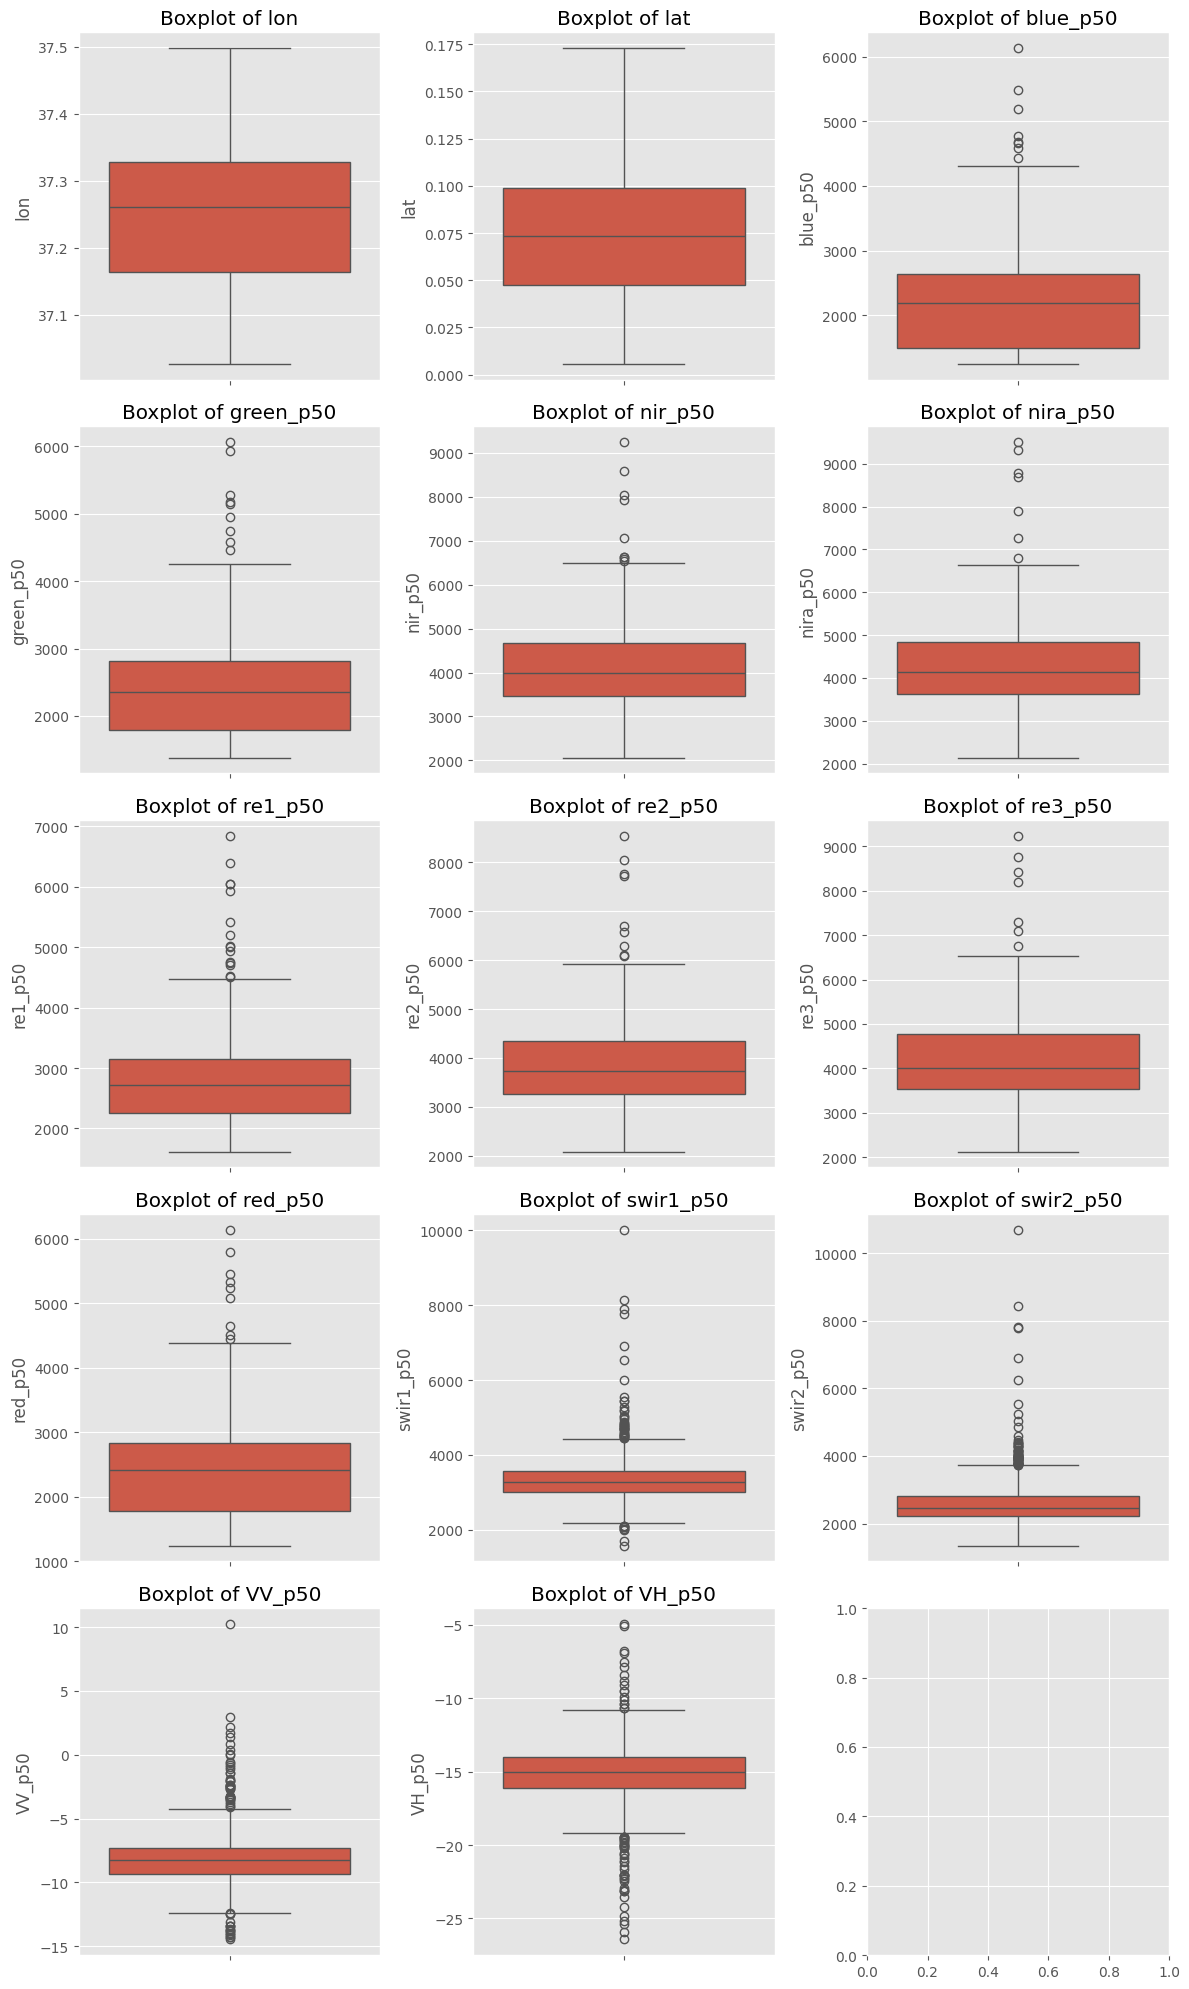

In [32]:
num_columns = len(kenya_train.columns) - 1  # Exclude the target column
num_rows = (num_columns + 2) // 3  # Calculate the required number of rows

# Create a figure and axes
fig, axs = plt.subplots(num_rows, 3, figsize=(16, num_rows * 4))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot histograms for each feature
for idx, column in enumerate(kenya_train.columns):
    if column != "TARGET":  # Exclude the target column
        sns.boxplot(y=kenya_train[column], ax=axs[idx])
        axs[idx].set_title(f"Boxplot of {column}")

# Hide any unused subplots
for j in range(idx + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### 2.4 Correlation Analysis

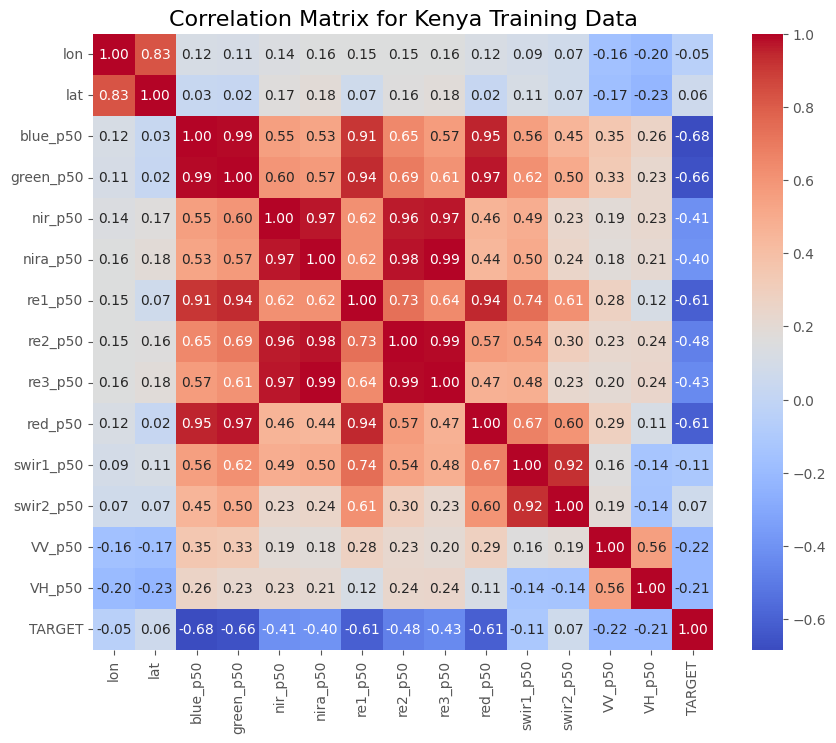

In [35]:
correlation_matrix = kenya_train.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 10}, fmt='.2f') 
plt.title("Correlation Matrix for Kenya Training Data", fontsize=16)  
plt.show()

In [ ]:
# Save checkpoint after loading and initial EDA
pickle.dump(kenya_train, open("../cleaned-data/kenya_training_cleaned.pkl", 'wb'))

# log_progress('Explorative Data Analysis complete')

# 3. Feature Selection

Most influential columns for classification, based on EDA:

In [9]:
kenya_NDVI_NDPI = kenya_train[['red_p50', 'nir_p50', 'swir1_p50', 'TARGET']] 

kenya_NDVI_NDPI.loc[:, 'NDVI'] = (kenya_NDVI_NDPI['nir_p50'] - kenya_NDVI_NDPI['red_p50']) / (kenya_NDVI_NDPI['nir_p50'] + kenya_NDVI_NDPI['red_p50'])
kenya_NDVI_NDPI.loc[:, 'NDPI_1'] = (kenya_NDVI_NDPI['swir1_p50'] - kenya_NDVI_NDPI['red_p50']) / (kenya_NDVI_NDPI['swir1_p50'] + kenya_NDVI_NDPI['red_p50'])
kenya_NDVI_NDPI.loc[:, 'NDPI_2'] = (kenya_NDVI_NDPI['swir1_p50'] - kenya_NDVI_NDPI['red_p50']) / (kenya_NDVI_NDPI['swir1_p50'] + kenya_NDVI_NDPI['red_p50'])

display(kenya_NDVI_NDPI)

C:\Users\HP\AppData\Local\Temp\ipykernel_12100\575381254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kenya_NDVI_NDPI.loc[:, 'NDVI'] = (kenya_NDVI_NDPI['nir_p50'] - kenya_NDVI_NDPI['red_p50']) / (kenya_NDVI_NDPI['nir_p50'] + kenya_NDVI_NDPI['red_p50'])
C:\Users\HP\AppData\Local\Temp\ipykernel_12100\575381254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kenya_NDVI_NDPI.loc[:, 'NDPI_1'] = (kenya_NDVI_NDPI['swir1_p50'] - kenya_NDVI_NDPI['red_p50']) / (kenya_NDVI_NDPI['swir1_p50'] + kenya_NDVI_NDP

,red_p50,nir_p50,swir1_p50,TARGET,NDVI,NDPI_1,NDPI_2
ID,,,,,,,
1,2994.0,5418.0,4108.5,1,0.288160,0.156917,0.156917
2,3344.0,5834.0,5269.0,1,0.271301,0.223499,0.223499
3,4380.0,6420.0,6905.0,1,0.188889,0.223748,0.223748
4,2787.0,4822.0,3832.0,1,0.267446,0.157879,0.157879
5,3939.0,6476.0,4892.5,1,0.243591,0.107966,0.107966
...,...,...,...,...,...,...,...
994,1502.5,3853.0,2999.0,2,0.438895,0.332445,0.332445
995,1569.0,4756.0,3298.0,2,0.503874,0.355250,0.355250
996,1843.0,3797.0,3784.5,2,0.346454,0.345002,0.345002


# Why adding nir_p50 can be beneficial:

`More Information:` The NIR band (specifically, the nir_p50 band in your case) carries valuable information about the reflectance of vegetation. Even though it might not be the primary indicator of plastic, it can still provide contextual information that can help your model distinguish between different land cover types and improve its overall accuracy.

`Reducing Overfitting:` Including additional features can help reduce overfitting by providing more data for the model to learn from. This allows the model to generalize better to unseen data and make more accurate predictions.

`Complementary Information:` The nir_p50 band complements the other bands you've selected (red, SWIR1, SWIR2) by providing a different perspective on the spectral signature of your data. This diversity can help your model learn more robust patterns.

# 4. Data Cleaning (Optional)

Remove outliers or handle missing values

In [ ]:
# Save checkpoint after cleaning
pickle.dump(kenya_train, open("../cleaned-data/kenya_training_cleaned.pkl", 'wb'))

# log_progress('Data cleaning complete')

# 5. Save Cleaned Data

Save the cleaned Kenya training data to the cleaned-data folder

In [ ]:

kenya_train.to_csv("../cleaned-data/kenya_training_cleaned.csv", index=False)

# log_progress('Data saved to CSV file')

# Model Suggestion:`

A suitable scikit-learn model to use for training would be:
`Random Forest Classifier:` This model is known for its performance on classification tasks, especially when dealing with complex relationships between features. Random Forests are good at handling non-linear relationships and are less prone to overfitting compared to some other models.

# Additional Tips:

`Spectral Indices:` Consider calculating additional spectral indices (e.g., NDPI, NDVI) using the selected bands to create features that capture specific contrasts.

`Feature Engineering:` Explore feature engineering techniques (e.g., transformations, combinations) to further improve the discriminatory power of your features.

`Hyperparameter Tuning:` After choosing the Random Forest model, carefully tune its hyperparameters to optimize performance on your specific dataset.

Remember to split your data into training and testing sets to evaluate the model's performance. Good luck!